In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx=pd.read_csv('../Datasets/Linear Regression/linearX.csv')
dfy=pd.read_csv('../Datasets/Linear Regression/linearY.csv')
x=dfx.values
y=dfy.values
print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


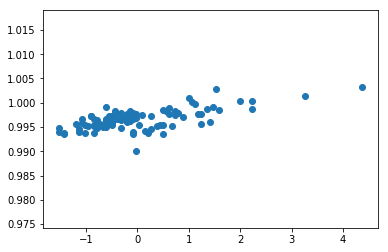

In [3]:
X=(x-x.mean())/x.std()
Y=y
plt.scatter(X,Y)
plt.show()

In [4]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

def error(X,Y,theta):
    m=X.shape[0]
    err=0
    for i in range(m):
        hx=hypothesis(X[i],theta)
        err+=(hx-y[i])**2
    return err

def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0]+=(hx-Y[i])
        grad[1]+=(hx-Y[i])*X[i]
    return grad    

In [5]:
def gradientDescent(X,Y,learning_rate=0.001):
    theta=np.zeros((2,))
    error_list=[]
    e=error(X,Y,theta)
    error_list.append(e)
    while(e>0.001):
        grad=gradient(X,Y,theta)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        e=error(X,Y,theta)
        error_list.append(e)
    return theta,error_list    

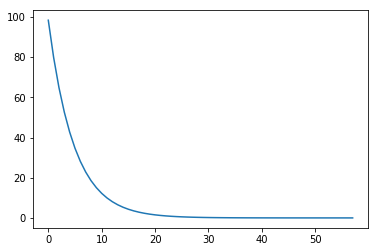

[0.99401687 0.00135437]
58


In [6]:
final_theta,error_list=gradientDescent(X,Y)
plt.plot(error_list)
plt.show()
print(final_theta)
print(len(error_list))

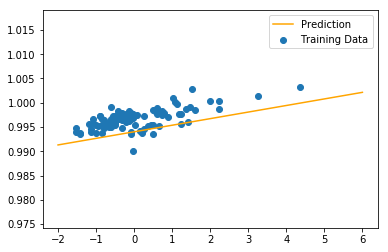

In [7]:
x_test=np.linspace(-2,6,10)
plt.scatter(X,Y,label="Training Data")
plt.plot(x_test,hypothesis(x_test,final_theta),color='orange',label='Prediction')
plt.legend()
plt.show()